<h1>Logistic Regression</h1>

Question 2.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#given functions for assinment
# Function for one-hot encoding
def one_hot_encoding(label_data):
    row_number = label_data.shape[0]
    num_labels = 10  # MNIST dataset (0-9)
    encoded_labels = np.zeros((row_number, num_labels), dtype='int')
    encoded_labels[list(range(row_number)), label_data] = 1
    return encoded_labels

# Function to read pixel data from the dataset
def read_pixels(data_path):
    with open(data_path, 'rb') as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    flattened_pixels = pixel_data.reshape(-1, 784)
    normalized_pixels = flattened_pixels / 255
    return normalized_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with open(data_path, 'rb') as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    one_hot_encoding_labels = one_hot_encoding(label_data)
    return one_hot_encoding_labels

# Function to read the entire dataset
def read_dataset(path):
    X_train = read_pixels(path+"/train-images-idx3-ubyte")
    y_train = read_labels(path+"/train-labels-idx1-ubyte")
    X_test = read_pixels(path+"/t10k-images-idx3-ubyte")
    y_test = read_labels(path+"/t10k-labels-idx1-ubyte")
    return X_train, y_train, X_test, y_test

In [2]:
def initialize_weights(numof_features, numof_classes, method='normal'):
    if method == 'zero':
        return np.zeros((numof_features, numof_classes))
    elif method == 'uniform':
        return np.random.uniform(-1, 1, size=(numof_features, numof_classes))
    elif method == 'normal':
        return np.random.normal(0, 1, size=(numof_features, numof_classes))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def loss_and_gradient(x, y, theta, lam):
    m = x.shape[0]
    scores = x.dot(theta)
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    cross_entropy_loss = -np.sum(y * np.log(probs + 1e-5)) / m
    L2 = (lam / 2) * np.sum(theta[1:] ** 2)
    loss = cross_entropy_loss + L2
    gradient = -x.T.dot(y - probs) / m
    gradient[1:] += lam * theta[1:]
    return loss, gradient

def predict(X, weights):
    score = np.dot(X, weights)
    y_pred = softmax(score)
    return np.argmax(y_pred, axis=1)

def create_confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes))

    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label, pred_label] += 1
    return matrix

def logistic_regression(X_train, y_train, batch_size, learning_rate, lam, epochs, init_type='normal'):
    num_samples, num_features = X_train.shape
    num_classes = y_train.shape[1]

    theta = initialize_weights(num_features, num_classes, method = init_type)

    losses = []

    for epoch in range(epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            loss, gradient = loss_and_gradient(X_batch, y_batch, theta, lam)
            theta -= learning_rate * gradient

        losses.append(loss)

    test_label_pred = predict(X_test, theta)
    test_label_true = np.argmax(y_test, axis=1)
    accuracy = np.mean(test_label_true == test_label_pred)

    conf_matrix = create_confusion_matrix(test_label_true, test_label_pred, num_classes)

    return theta, losses, conf_matrix, accuracy

def visualize_results(matrix, accuracy, num_classes = 10):
    print("Accuracy of Model: " + str(accuracy))
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, int(matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > matrix.max() / 2 else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

In [4]:
# default parameters
def_batch_size = 200
def_learning_rate = 0.0005
def_lam = 0.0001
def_epochs = 100

#loading datas
path = "./mnist"
X_train, y_train, X_test, y_test = read_dataset(path)

X_valid = X_train[:10000] #take first 10000 element to be validation data
X_train = X_train[10000:]
y_valid = y_train[:10000] #take first 10000 element to be validation data
y_train = y_train[10000:]

In [7]:
theta, losses, confusion_matrix, accuracy = logistic_regression(X_train, y_train, def_batch_size, def_learning_rate, def_lam, def_epochs)

Accuracy of Model: 0.5029


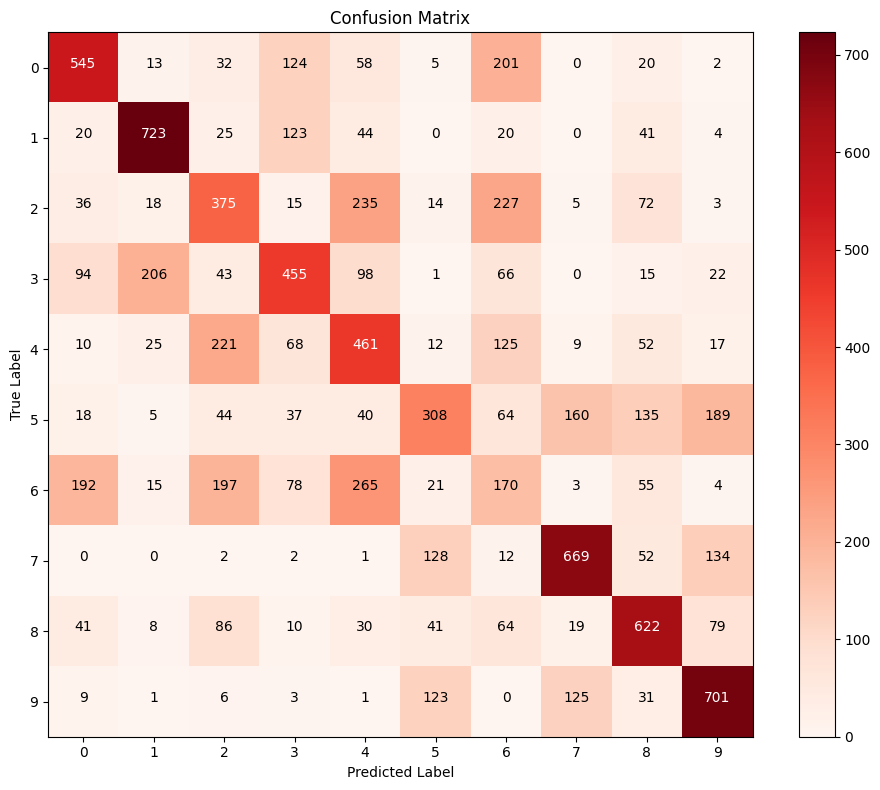

In [8]:
visualize_results(confusion_matrix, accuracy)

Question 2.2

In [9]:
#given in assignment to test model
batch_sizes = [1, 64, 3000]
init_methods = ['zero', 'uniform', 'normal']
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
lams = [0.01, 0.0001, 0.000000001]

#variables to select best resulting accuracy
best_batch = 0
best_init = 0
best_learning_rate = 0
best_lam = 0

In [10]:
#testing batch sizes
old_acc = 0
for batch_size in batch_sizes:
    acc = logistic_regression(X_train, y_train, batch_size, def_learning_rate, def_lam, def_epochs)[-1]
    if acc > old_acc:
        best_batch = batch_size
    print(f'Test accuracy with batch size {batch_size}: ' + str(acc))
    old_acc = acc


Test accuracy with batch size 1: 0.8236
Test accuracy with batch size 64: 0.6199
Test accuracy with batch size 3000: 0.1671


In [12]:
#testing init methods
old_acc = 0
for init_method in init_methods:
    acc = logistic_regression(X_train, y_train, def_batch_size, def_learning_rate, def_lam, def_epochs, init_method)[-1]
    if acc > old_acc:
        best_init = init_method
    print(f'Test accuracy with weight initialization method {init_method}: ' + str(acc))
    old_acc = acc

Test accuracy with weight initialization method zero: 0.7677
Test accuracy with weight initialization method uniform: 0.595
Test accuracy with weight initialization method normal: 0.5023


In [13]:
#testing learning rates
old_acc = 0
for learning_rate in learning_rates:
    acc = logistic_regression(X_train, y_train, def_batch_size, learning_rate, def_lam, def_epochs)[-1]
    if acc > old_acc:
        best_learning_rate = learning_rate
    print(f'Test accuracy with learning rate {learning_rate}: ' + str(acc))
    old_acc = acc

Test accuracy with learning rate 0.01: 0.7513
Test accuracy with learning rate 0.001: 0.5976
Test accuracy with learning rate 0.0001: 0.2573
Test accuracy with learning rate 1e-05: 0.0787


In [14]:
#testing lams
old_acc = 0
for lam in lams:
    acc = logistic_regression(X_train, y_train, def_batch_size, def_learning_rate, lam, def_epochs)[-1]
    if acc > old_acc:
        best_lam = lam
    print(f'Test accuracy with regularization coefficient (lambda) {lam}: ' + str(acc))
    old_acc = acc

Test accuracy with regularization coefficient (lambda) 0.01: 0.5232
Test accuracy with regularization coefficient (lambda) 0.0001: 0.5244
Test accuracy with regularization coefficient (lambda) 1e-09: 0.5131


Question 2.3

In [15]:
#optimal model with best batch size, init method, learning_rate, lambda
optimal_theta, _, optimal_confusion_matrix, optimal_accuracy = logistic_regression(X_train, y_train, best_batch, best_learning_rate, best_lam, def_epochs, best_init)

Accuracy of Model: 0.8205


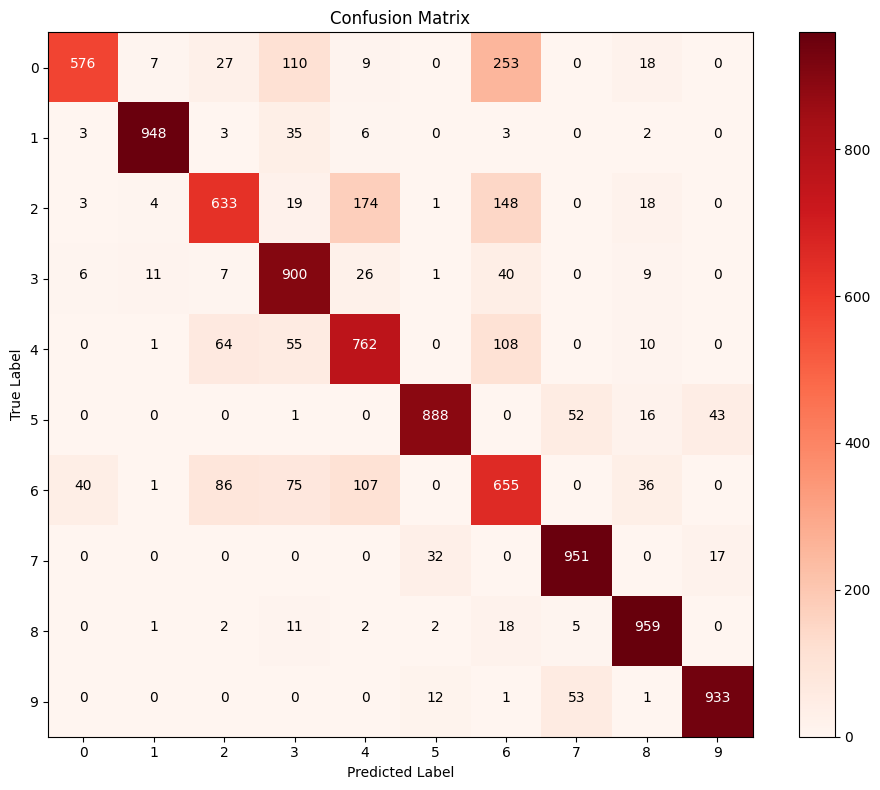

In [16]:
visualize_results(optimal_confusion_matrix, optimal_accuracy)

Question 2.4

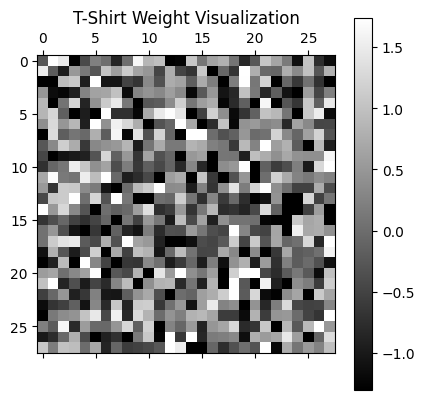

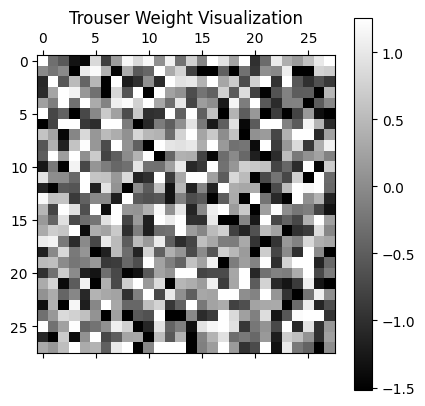

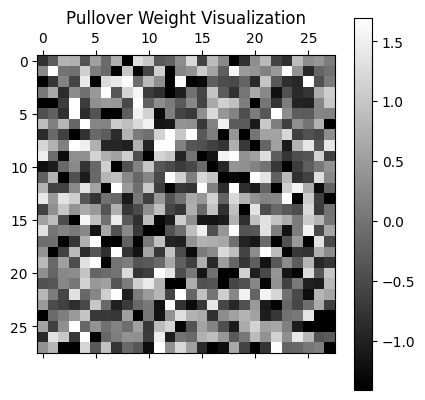

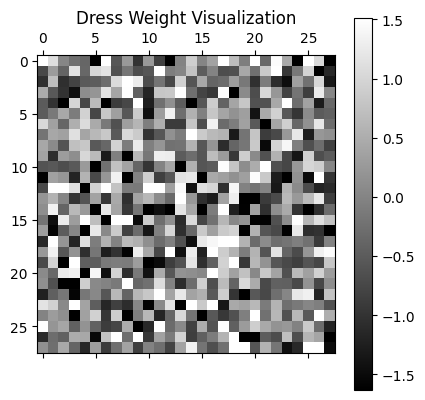

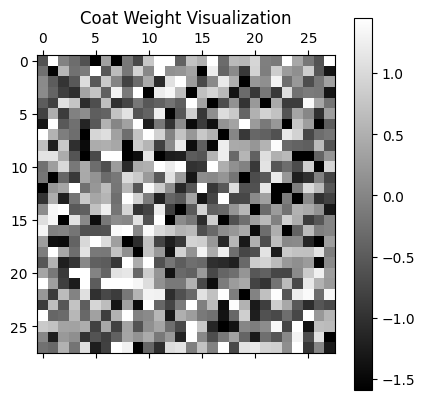

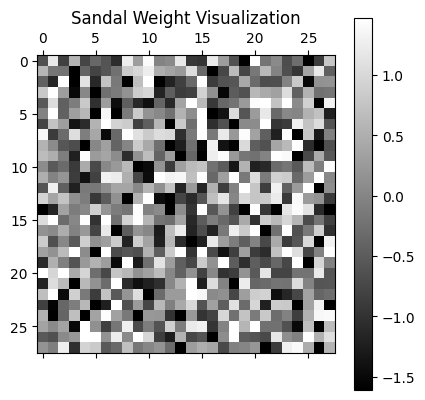

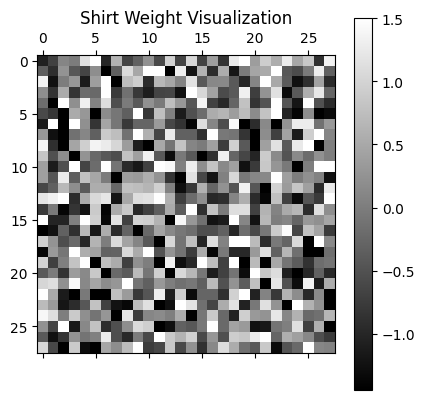

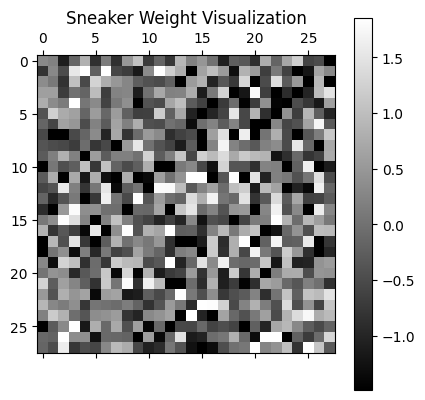

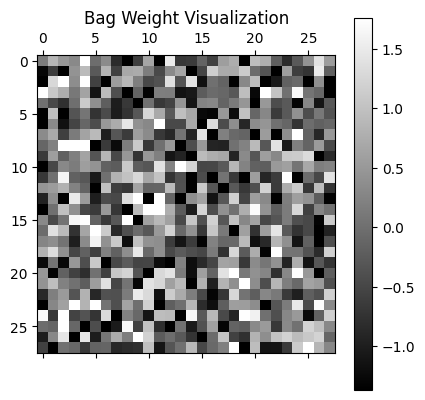

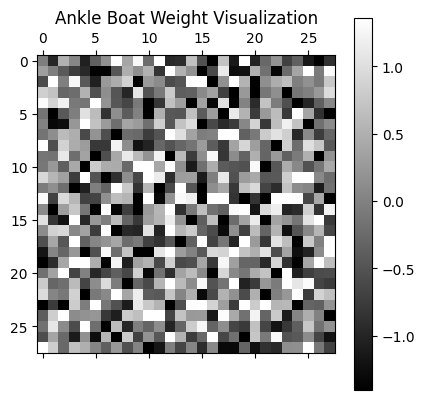

In [17]:
labels = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boat']
for i in range(10):
    weight = theta[:, i].reshape(28, 28)
    # given code
    plt.matshow(weight, cmap=plt.cm.gray, vmin=0.5*weight.min(), vmax=0.5*weight.max())
    plt.title(f"{labels[i]} Weight Visualization")
    plt.colorbar()
    plt.show()

Question 2.5

In [18]:
def analyze_model(conf_matrix, class_index):
    tp = conf_matrix[class_index, class_index]  # true pos
    fp = np.sum(conf_matrix[:, class_index]) - tp  # false pos
    fn = np.sum(conf_matrix[class_index, :]) - tp  # false neg

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # F1 and F2 score calculations
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f2 = (5 * precision * recall) / (4 * precision + recall) if (precision + recall) > 0 else 0

    return f1, f2, precision, recall

In [19]:
for i in range(10):
    class_f1, class_f2, class_pre, class_rec = analyze_model(optimal_confusion_matrix, i)
    print(f"Class {labels[i]}:\t Precision={class_pre:.2f}, Recall={class_rec:.2f}, F1 Score={class_f1:.2f}, F2 Score={class_f2:.2f}")


Class T-Shirt:	 Precision=0.92, Recall=0.58, F1 Score=0.71, F2 Score=0.62
Class Trouser:	 Precision=0.97, Recall=0.95, F1 Score=0.96, F2 Score=0.95
Class Pullover:	 Precision=0.77, Recall=0.63, F1 Score=0.69, F2 Score=0.66
Class Dress:	 Precision=0.75, Recall=0.90, F1 Score=0.82, F2 Score=0.86
Class Coat:	 Precision=0.70, Recall=0.76, F1 Score=0.73, F2 Score=0.75
Class Sandal:	 Precision=0.95, Recall=0.89, F1 Score=0.92, F2 Score=0.90
Class Shirt:	 Precision=0.53, Recall=0.66, F1 Score=0.59, F2 Score=0.63
Class Sneaker:	 Precision=0.90, Recall=0.95, F1 Score=0.92, F2 Score=0.94
Class Bag:	 Precision=0.90, Recall=0.96, F1 Score=0.93, F2 Score=0.95
Class Ankle Boat:	 Precision=0.94, Recall=0.93, F1 Score=0.94, F2 Score=0.93
